In [17]:
# Import the correct libaries for the lab
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('marketing_customer_analysis.csv')

# Drops the unamed column which is not needed here
if "Unnamed: 0" in df.columns:
    df.drop("Unnamed: 0", axis=1, inplace=True)

# Create 2 new dataframes, one for numerical values and one for categoricals
numerical = df.select_dtypes(include=np.number)
categoricals = df.select_dtypes(include=object)

In [18]:
numerical.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,9025.067525,23675,117,NaN,31,NaN,7,707.925645


In [19]:
categoricals.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN


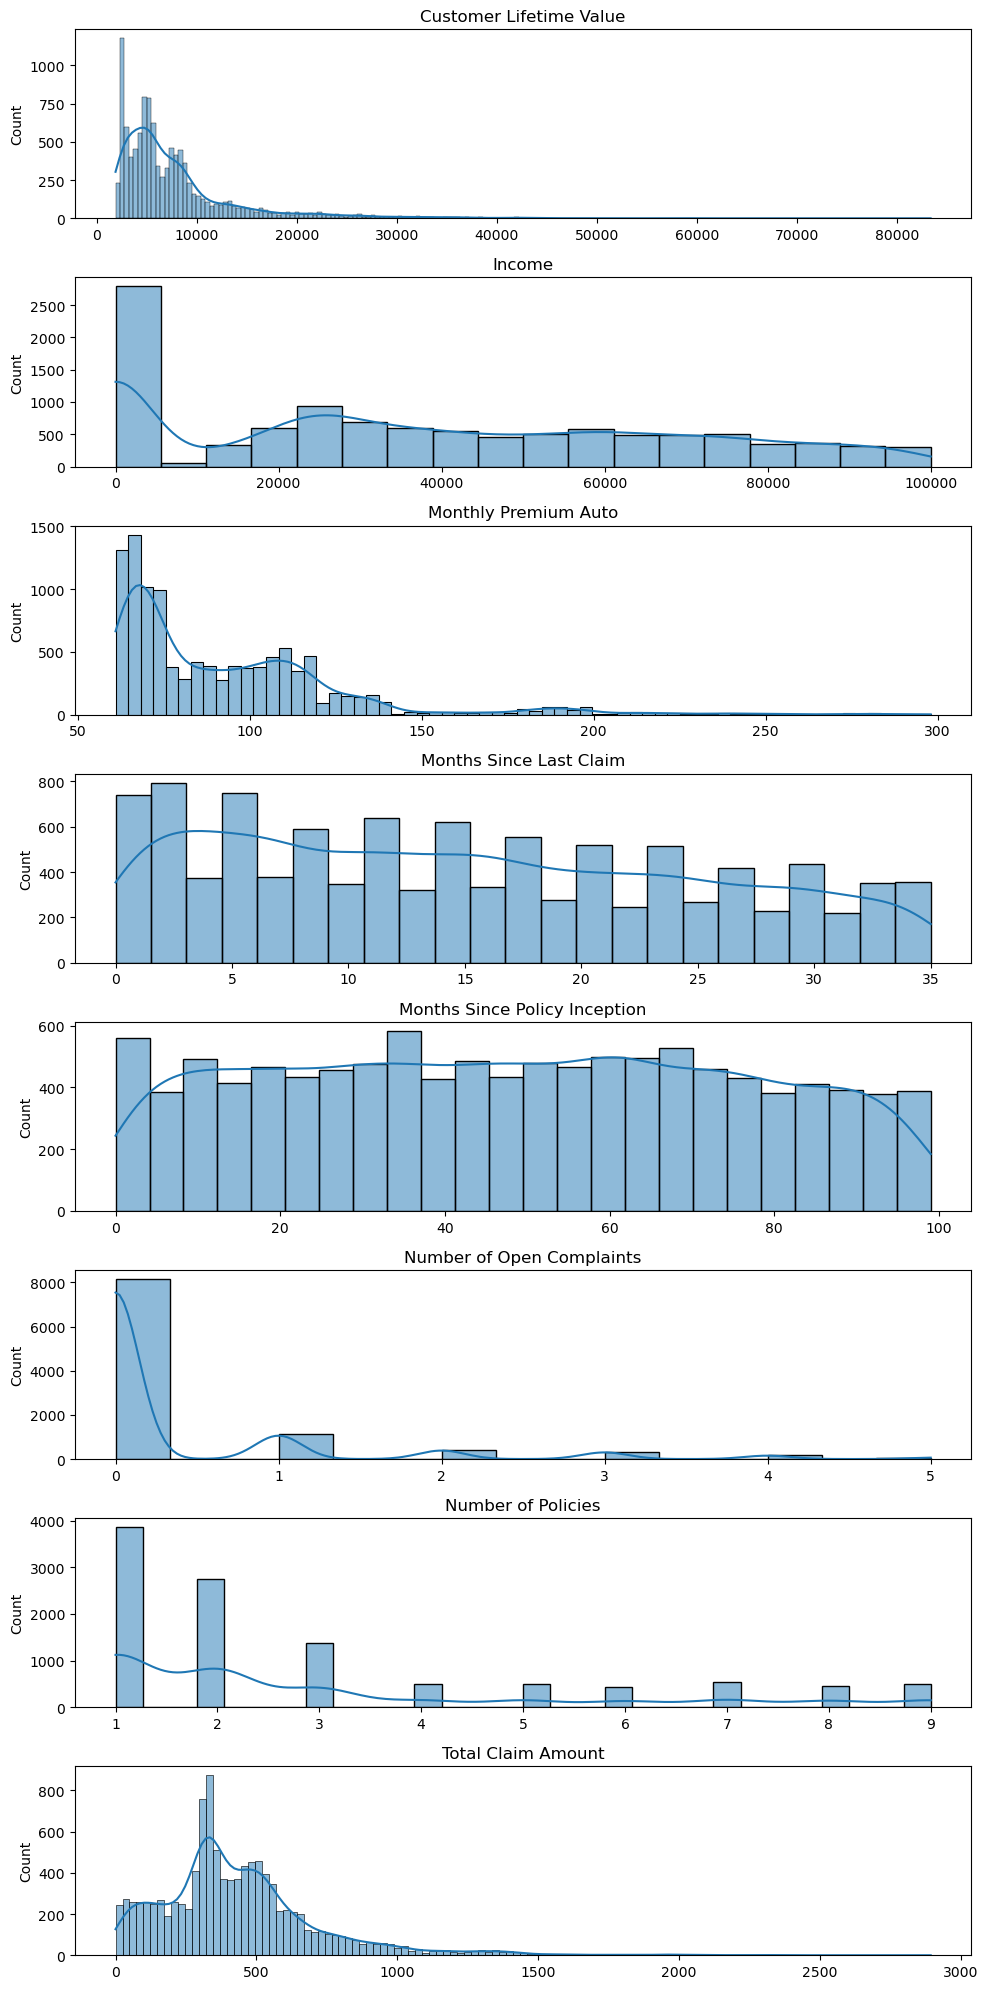

In [20]:
# Uses seaborn library to make distribution plots for the numerical variables and display histograms with matplotlib

fig, axes = plt.subplots(len(numerical.columns), 1, figsize=(10, 20))
for i, column in enumerate(numerical.columns):
    sns.histplot(numerical[column], ax=axes[i], kde=True)
    axes[i].set_title(column)
    axes[i].set_xlabel('')
plt.tight_layout()
plt.show()


In [21]:
# Calculates skewness for each distribution
skewness = numerical.skew()
print("Skewness values:\n", skewness)

Skewness values:
 Customer Lifetime Value          3.001047
Income                           0.285839
Monthly Premium Auto             2.116567
Months Since Last Claim          0.270327
Months Since Policy Inception    0.033642
Number of Open Complaints        2.803731
Number of Policies               1.242574
Total Claim Amount               1.729286
dtype: float64


Observations:

We can see the skewness is especially high for "Customer Lifetime Value", "Monthly Premium Auto", "Number of Complaints" and "Total CLaim Amount" (right skew). "Months Since Policy Pnception" is close to symmetrical and the rest are right skewed but not as badly as the others.